Coefficient (Beta) vector after 25 iterations: [5.68818858 0.42832884 0.57840717 0.69917913 0.7885857  0.84670154
 0.87535959]


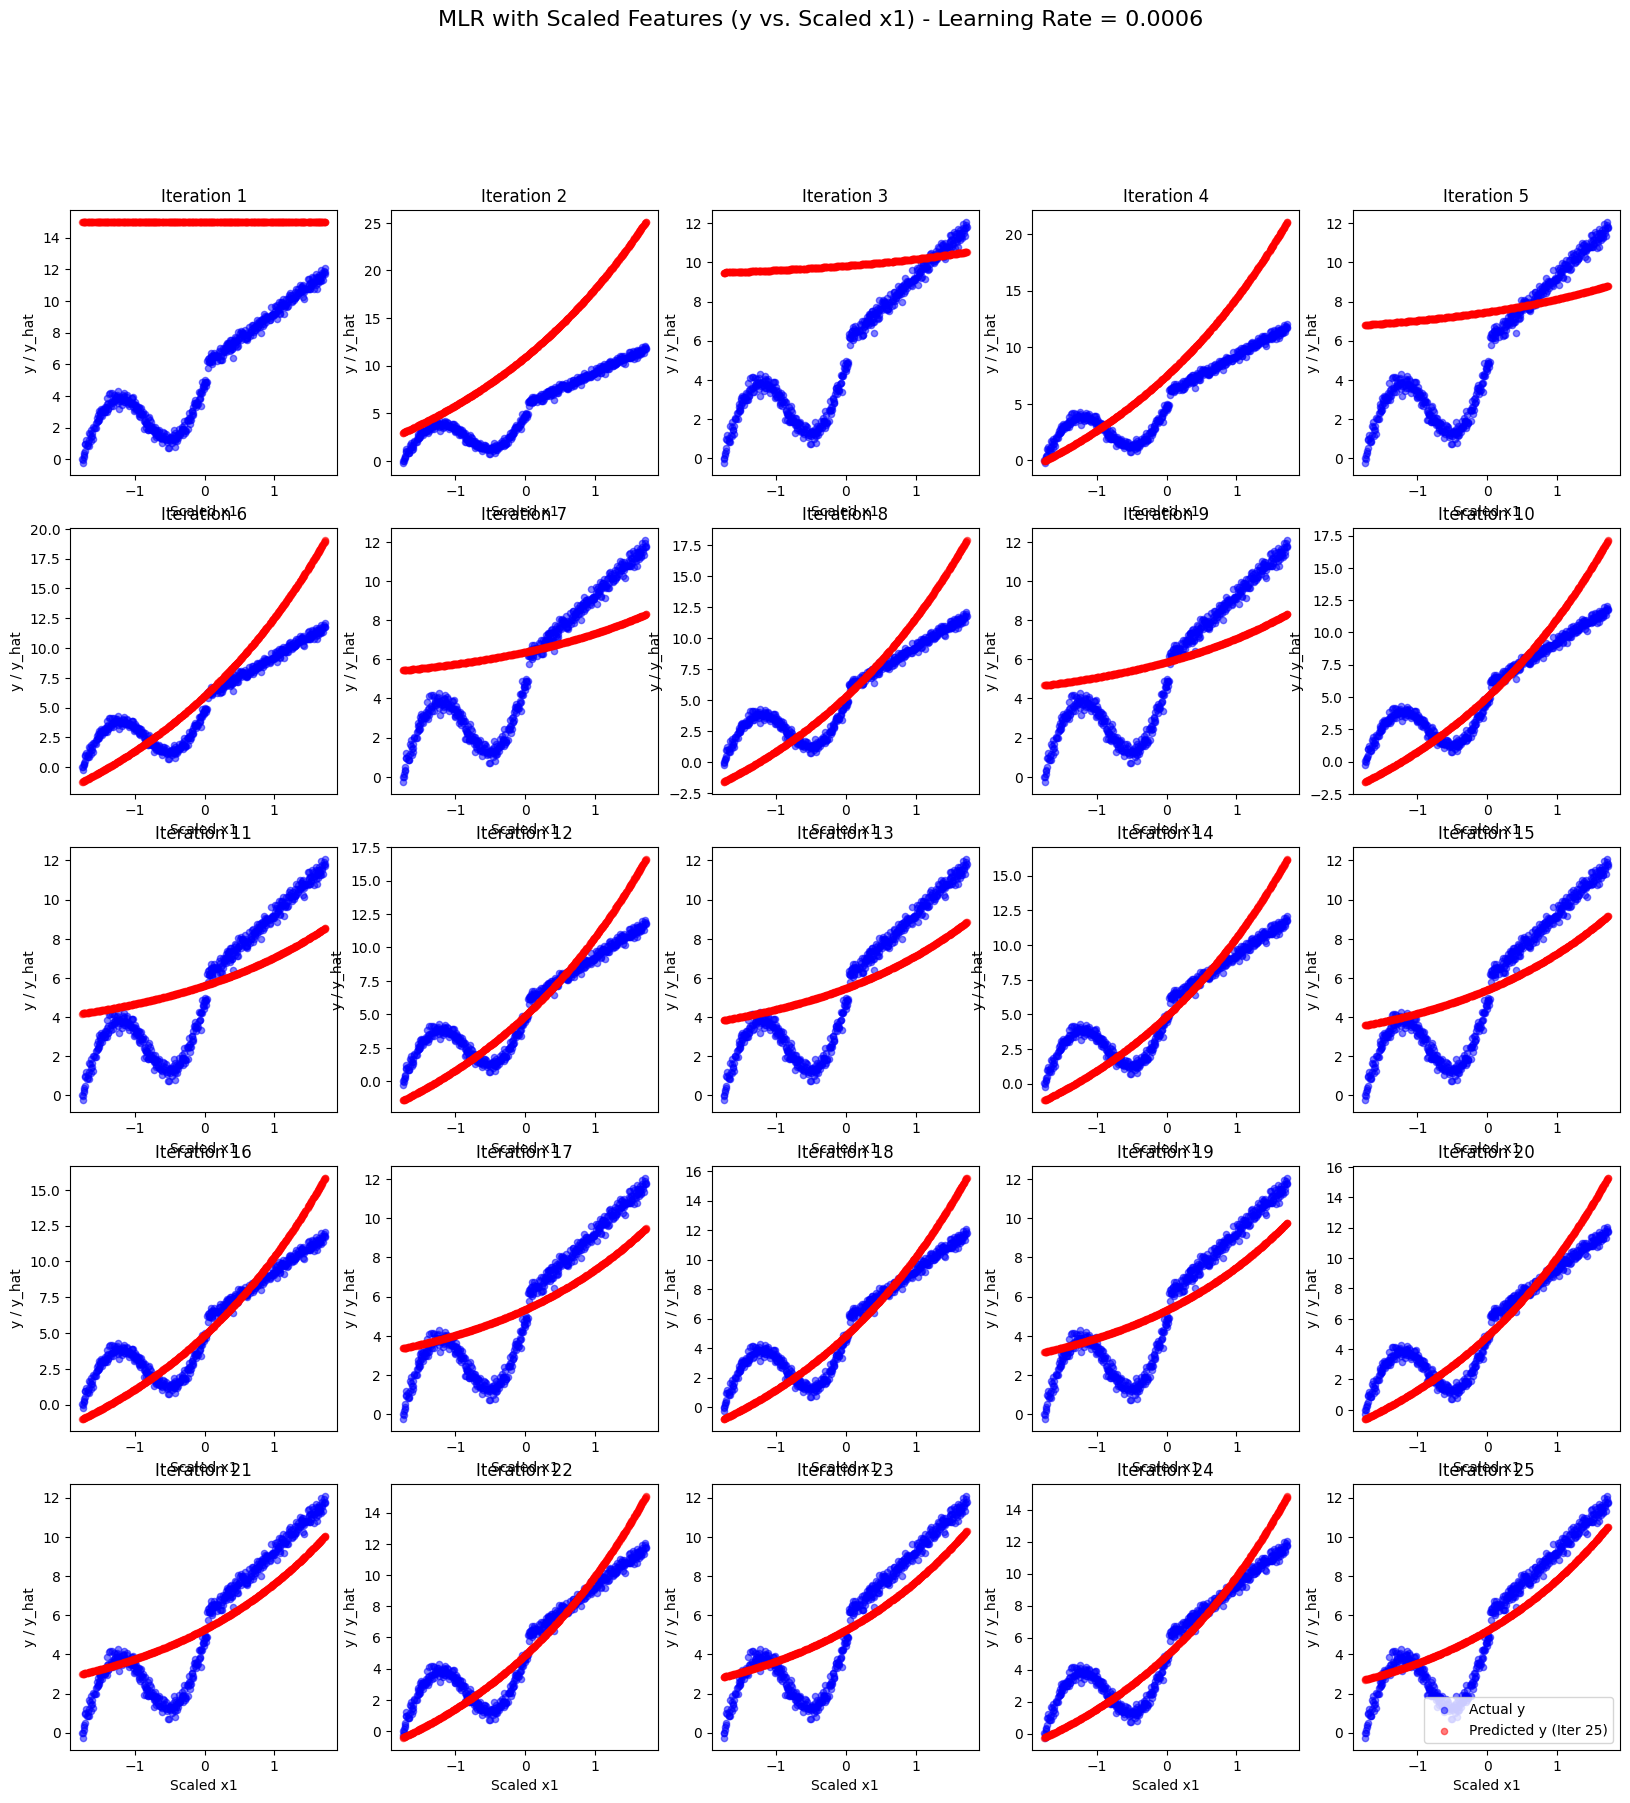

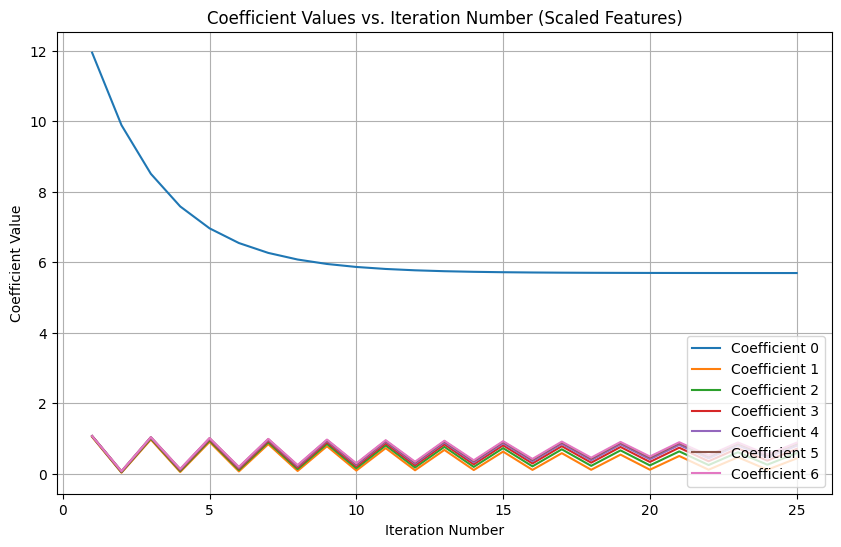

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the data
loc_filename = 'for-gradient-descent.xlsx'
try:
    df = pd.read_excel(loc_filename)
except FileNotFoundError:
    print(f"Error: The file {loc_filename} was not found. Please make sure it is in the same directory.")
    exit()

# Extract features and target
X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']]
y = df['y']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add intercept
X_with_intercept = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Set learning rate and other parameters
learning_rate = 0.0006
iterations = 25
plot_frequency = 1
horiz_axis = 'x1'  # Original axis for plotting; here we will use scaled x1 for scatter
coeffs = [15, 0, 0, 0, 0, 0, 0]
coeffs_history = []

# Prepare for plotting
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
fig.suptitle(f'MLR with Scaled Features (y vs. Scaled {horiz_axis}) - Learning Rate = {learning_rate}', fontsize=16)
axs = axs.flatten()
plot_index = 0

for i in range(iterations):
    y_hat = X_with_intercept.dot(coeffs)
    error = y_hat - y
    coeffs = coeffs - learning_rate * (X_with_intercept.T.dot(error))
    if (i+1) % plot_frequency == 0:
        coeffs_history.append(coeffs.copy())
        ax = axs[plot_index]
        ax.scatter(X_scaled[:, 0], y, label='Actual y', color='blue', s=20, alpha=0.5)
        ax.scatter(X_scaled[:, 0], y_hat, label=f'Predicted y (Iter {i+1})', color='red', s=20, alpha=0.5)
        ax.set_title(f'Iteration {i+1}')
        ax.set_xlabel(f'Scaled {horiz_axis}')
        ax.set_ylabel('y / y_hat')
        plot_index += 1

print(f"Coefficient (Beta) vector after {iterations} iterations: {coeffs}")

axs[-1].legend(loc='lower right')
plt.show()

# Plot coefficient trajectories
coeffs_history_np = np.array(coeffs_history)
plt.figure(figsize=(10, 6))
for j in range(coeffs_history_np.shape[1]):
    plt.plot(range(1, iterations + 1), coeffs_history_np[:, j], label=f'Coefficient {j}')
plt.title('Coefficient Values vs. Iteration Number (Scaled Features)')
plt.xlabel('Iteration Number')
plt.ylabel('Coefficient Value')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
